# Assignment 3

In the Assignemnt 3, we will need to use at least four binary variables to build models and to predict the survival rate.  In the end, I will use cross-validation on the training set to select the best model prior to submitting my forecasts for competition.

I will take the actions below to build the best model for competition.
1. Exploratory data analysis
2. Feature engineering
3. Build and compare model
4. Model for competition


In [1]:
# Upload the necessary libiaries
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

C:\Users\hiefu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Upload the dataset
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# 1. Exploaratory Data Analysis

In [3]:
# Get the variables' names
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [4]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Data dictinoary:

* Survived: 0 = No, 1 = Yes
    
* Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

* Sibsp: # of siblings / spouses aboard the Titanic

* Parch: # of parents / children aboard the Titanic

* Ticket: Ticket number

* Cabin: Cabin number
* Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
# Get the train dataset information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the above information, we can see there are a lot of missing values in the "Cabin" variables and a few missing values in "Age" varilabe in the training dataset.

In [6]:
# Check how many row and columns on the tarining dataset
train_df.shape

(891, 12)

There are total 891 rows and 12 different variables in the training dataset. 

In [7]:
# Get the test dataset information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


When we look at the test dataset, we can see the similar missing value trend. There are a lot of missing values in the "Cabin" variable and follow by the "Age" variable.     

In [8]:
# Check how many rows and columns on the test dataset
test_df.shape

(418, 11)

From the information above, there are 418 rows and 11 different variables in the test dataset.

# 1.1 Variable Exploration

0    549
1    342
Name: Survived, dtype: int64

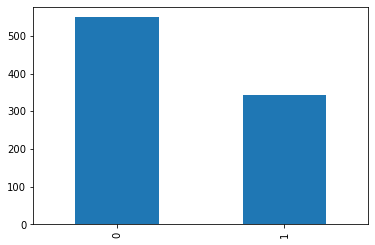

In [9]:
# Survived variable
train_df['Survived'].value_counts().plot(kind='bar')
train_df['Survived'].value_counts()

Based on the above information, the dataset shows that there were 549 passengers who died while 342 survived.

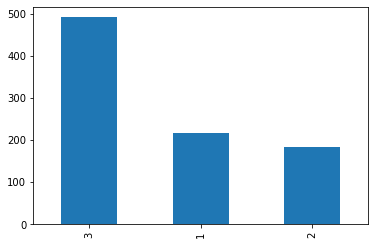

In [10]:
# Pclass variable
train_df['Pclass'].value_counts().plot(kind='bar')

The majority travelors are in the class 3, followed by class 1 and 2.

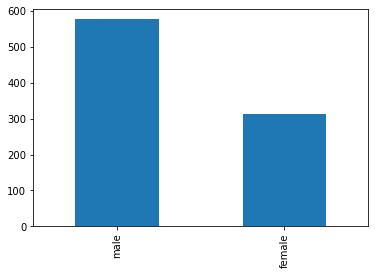

In [11]:
# Sex vaiable
train_df["Sex"].value_counts().plot(kind="bar")

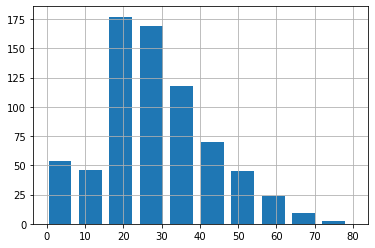

In [12]:
# Age variable
train_df["Age"].hist(width=6)

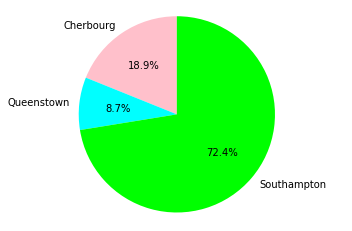

In [13]:
# Embarked variable
labels="Cherbourg","Queenstown","Southampton"
sizes=[sum(train_df["Embarked"]=="C"),sum(train_df["Embarked"]=="Q"),sum(train_df["Embarked"]=="S")]
colors=["pink","aqua","lime"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%',startangle=90)
 
plt.axis('equal')
plt.show()

# 1.2 Survival Rate Analysis

In [14]:
# Barchart for each variable survival rate
def sur_bar_chart(feature):
    Died=train_df[train_df['Survived']==0][feature].value_counts()/len(train_df["Survived"]==0)
    Survived=train_df[train_df["Survived"]==1][feature].value_counts()/len(train_df["Survived"]==1)
    data=pd.DataFrame([Survived, Died])
    data.index=["Survived", "Died"]
    data.plot(kind="bar", stacked=True, title="Percentage")
    return data.head()


,female,male
Survived,0.261504,0.122334
Died,0.090909,0.525253


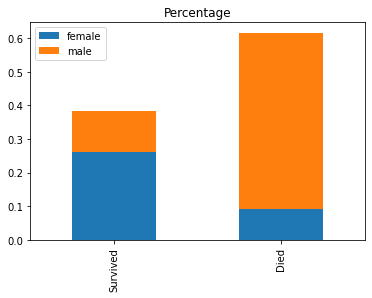

In [15]:
# Survival rate - Sex
sur_bar_chart("Sex")

,1,2,3
Survived,0.152637,0.097643,0.133558
Died,0.089787,0.108866,0.417508


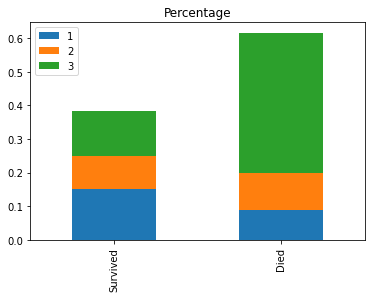

In [16]:
# Survival rate - Pclass
sur_bar_chart("Pclass")

,0,1,2,3,4,5,8
Survived,0.235690,0.125701,0.014590,0.004489,0.003367,NaN,NaN
Died,0.446689,0.108866,0.016835,0.013468,0.016835,0.005612,0.007856


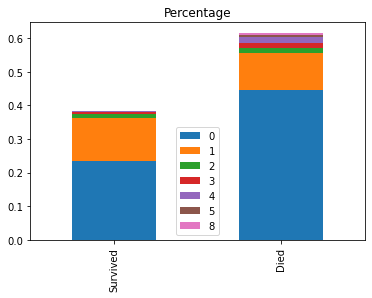

In [17]:
# Survival rate - SibSp
sur_bar_chart("SibSp")

,0,1,2,3,4,5,6
Survived,0.261504,0.072952,0.044893,0.003367,NaN,0.001122,NaN
Died,0.499439,0.059484,0.044893,0.002245,0.004489,0.004489,0.001122


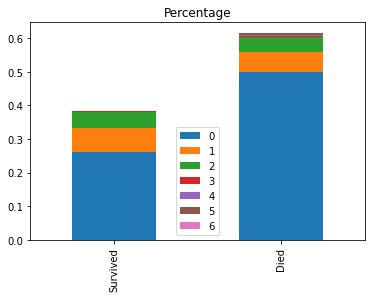

In [18]:
# Survival rate - Parch
sur_bar_chart("Parch")

,S,C,Q
Survived,0.243547,0.104377,0.03367
Died,0.479237,0.084175,0.05275


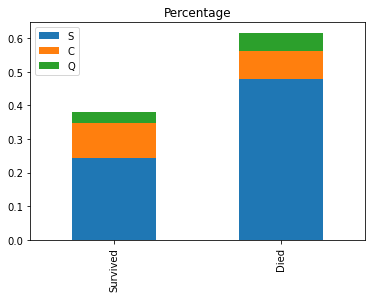

In [19]:
# Survival rate - Embarked
sur_bar_chart("Embarked")

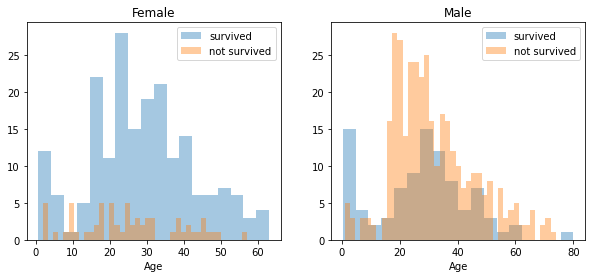

In [20]:
# Survive vs Not-survive by gender and age
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

From the above information, we could see 
1. the female has higher survived rate overall
2. the younger the male the higher the survived rate
3. the male has higher survived than non-survived rate between age 30 to age 35. 

C:\Users\hiefu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


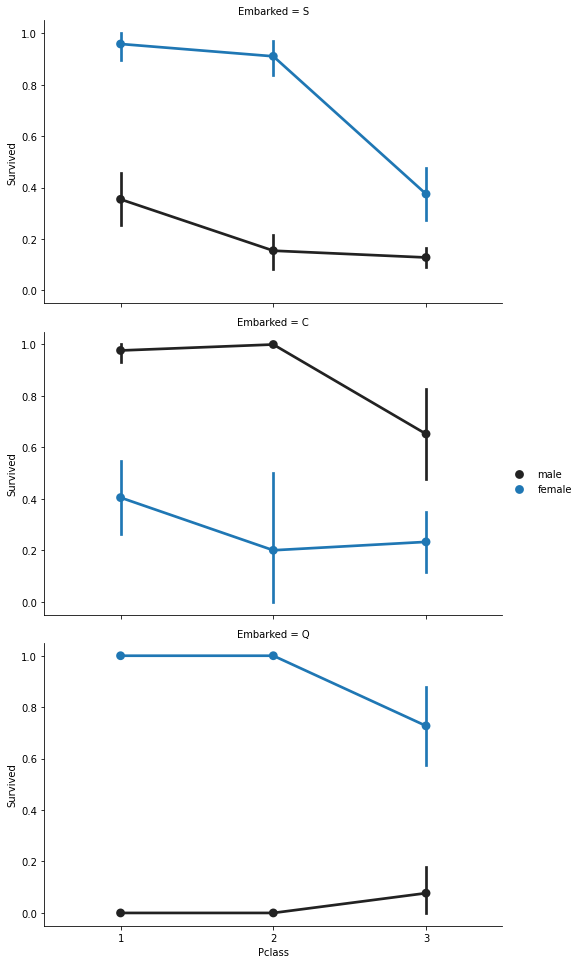

In [21]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

From the above information, we can see all the female has higher survival rate beside the people on board from cherbourg. 

C:\Users\hiefu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


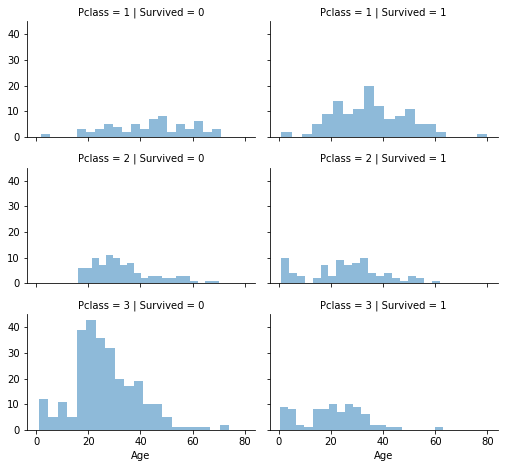

In [22]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

From the chart above, we can see there are more people with age 20 years old and above survived if they are in the class 1. 

In [23]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\hiefu\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


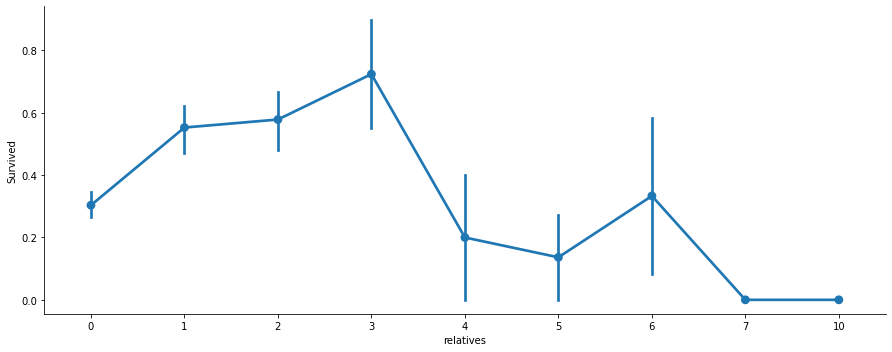

In [24]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

We can see the survival rate is increasing up to three members family. If there are more than three family memebers on the titantic, the survival rate would decrease. The survival rate is 0 when you have seven and above family memebers on the titantic.

# 1.3 Correlation of Each Variables

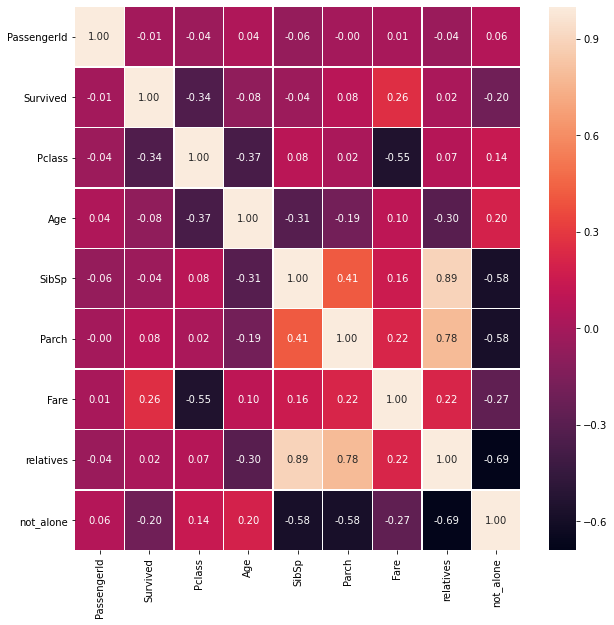

In [25]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train_df.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

# 2. Feature Engineering

# 2.1 Dealing with Missing Values

In [26]:
# Check the missing value % on the traing dataset
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
not_alone,0,0.0
relatives,0,0.0


In [27]:
# Check the missing value % on the test dataset
total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
not_alone,0,0.0
relatives,0,0.0


# 2.1.1 Dealing with missing value in Cabin
As we can see from the above, there are more than 75% of Cabin's information is missing. Therefore, I will decide to drop this variable since this variable doesn't provide meaningful information

In [28]:
# Drop the Cabin variable in train dataset
train_df.drop("Cabin", axis=1, inplace=True)
train_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,0,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,0,1


In [29]:
# Drop the Cabin variable in test dataset
test_df.drop("Cabin", axis=1, inplace=True)
test_df.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,0,1
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,C,2,0


# 2.1.2 Dealing with missing value in Age
Right now, we know age plays an important for determing the survivarl rate, and we also know there are more than 20% of Age's data is missing. It would be not accurate to replace the missing value with the mean or median. From the correlation heatmap above, we know that age is most correlated with Pclass and SibSp. I would first differentiate the missing age datas by their social-economic status and number of siblings/spouses  on board with, and then I would use the median of each subset as the replacement for the missing values.

In [30]:
# identify the median age for each category in Pcalss and SibSp in train dateset
train_set_1=train_df.groupby(["Pclass","SibSp"])
train_set_1_median=train_set_1.median()
train_set_1_median

PassengerId  Survived   Age  Parch      Fare  relatives  \
Pclass SibSp                                                            
1      0            476.0       1.0  37.0    0.0   39.6000        0.0   
       1            485.0       1.0  38.0    0.0   79.2000        1.0   
       2            572.0       1.0  44.0    0.0  133.6500        2.0   
       3             89.0       1.0  23.0    2.0  263.0000        5.0   
2      0            407.0       0.0  30.0    0.0   13.0000        0.0   
       1            451.0       1.0  29.0    1.0   26.0000        2.0   
       2            565.5       0.5  23.5    1.0   39.0000        3.0   
       3            727.0       1.0  30.0    0.0   21.0000        3.0   
3      0            472.0       0.0  26.0    0.0    7.8958        0.0   
       1            372.0       0.0  25.0    0.0   15.5500        1.0   
       2            334.0       0.0  19.5    0.0   19.2583        2.0   
       3            302.5       0.0   6.0    1.0   25.4667        4.0   
       4            264.5       0.0   6.5    1.5   31.2750        5.5   
       5            387.0       0.0  11.0    2.0   46.9000        7.0   
       8            325.0       0.0   NaN    2.0   69.5500       10.0   

              not_alone  
Pclass SibSp             
1      0              1  
       1              0  
       2              0  
       3              0  
2      0              1  
       1              0  
       2              0  
       3              0  
3      0              1  
       1              0  
       2              0  
       3              0  
       4              0  
       5              0  
       8              0

In [31]:
# identify the median age for each category in Pcalss and SibSp in train dateset
test_set_1=test_df.groupby(["Pclass","SibSp"])
test_set_1_median=test_set_1.median()
test_set_1_median

PassengerId   Age  Parch       Fare  relatives  not_alone
Pclass SibSp                                                           
1      0           1088.0  39.0    0.0   42.50000        0.0          1
       1           1109.5  46.0    0.0   82.06250        1.0          0
       2            969.0  55.0    0.0   51.47920        2.0          0
       3            945.0  28.0    2.0  263.00000        5.0          0
2      0           1117.5  27.0    0.0   13.00000        0.0          1
       1           1139.0  29.0    0.0   26.00000        1.0          0
       2           1077.5  21.0    0.5   31.50000        2.5          0
3      0           1095.5  24.0    0.0    7.82920        0.0          1
       1           1084.0  20.0    1.0   15.24580        2.0          0
       2           1059.0  19.5    0.0   21.67920        2.0          0
       3           1281.0  29.0    1.0   21.07500        4.0          0
       4           1076.0  11.5    2.0   30.25625        6.0          0
       5           1032.0  10.0    2.0   46.90000        7.0          0
       8           1166.0  14.5    2.0   69.55000       10.0          0

In [32]:
# Replace missing values in the "Age" based on tehir groups (Pclass and SibSp)
def fill_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median()  #I used the median age of Pclass=3 as a replacement as there is no median value for SibSp=8 in training dataset

In [33]:
train_df["Age"]=train_df["Age"].fillna(fill_age(train_df,train_set_1_median))
test_df["Age"]=test_df["Age"].fillna(fill_age(test_df,test_set_1_median))

In [34]:
train_df['Age'].isnull

<bound method Series.isnull of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [35]:
test_df['Age'].isnull

<bound method Series.isnull of 0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    24.0
414    39.0
415    38.5
416    24.0
417    24.0
Name: Age, Length: 418, dtype: float64>

# 2.1.3 Dealing with missing value in Embarked
There are only two missing value in Embarked; therefore, I will just replcae it with Southeamption since the majority of passengers are embarked on Southampton.

In [36]:
train_df['Embarked']=train_df['Embarked'].fillna("S")

 I will creat 2 columns (Embarked S and Embarked C), leaving out Embarked Q to prevent collinearity.

In [37]:
def new_embark_features(dataset):
    dataset["Embarked S"]=np.where(dataset["Embarked"]=="S",1,0)
    dataset["Embarked C"]=np.where(dataset["Embarked"]=="C",1,0)  #Embarked on Q is when the rest of embarked are 0

In [38]:
new_embark_features(train_df)
new_embark_features(test_df)

# 2.1.4 Dearling with missing value in Fare
Since there is only one missing value in Fare, I will first identify the Pclass for this missing data and use the Pclass median value to replace the missing value.

In [39]:
# fill missing fare with median fare for each Pclass
test_df["Fare"].fillna(test_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_df["Age"].isnull

<bound method Series.isnull of 0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    24.0
414    39.0
415    38.5
416    24.0
417    24.0
Name: Age, Length: 418, dtype: float64>

# 2.2 Creating New Variable

# 2.2.1 Title
Assign social status title to each data based on the name.

In [40]:
# Split the name
train_df.insert(value=train_df.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=11,column="Title")
test_df.insert(value=test_df.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=10,column="Title")

In [41]:
# Add title based on the name
title_map={"Capt": "Officer",
            "Col": "Officer",
            "Major": "Officer",
            "Jonkheer": "Royalty",
            "Don": "Royalty",
            "Sir" : "Royalty",
            "Dr": "Officer",
            "Rev": "Officer",
            "the Countess":"Royalty",
            "Dona": "Royalty",
            "Mme":  "Mrs",
            "Mlle": "Miss",
            "Ms": "Mrs",
            "Mr" : "Mr",
            "Mrs" : "Mrs",
            "Miss" : "Miss",
            "Master" : "Master",
            "Lady" : "Royalty"}
train_df["Title"]=train_df.Title.map(title_map)
test_df["Title"]=test_df.Title.map(title_map)

In [42]:
# Encoding titles
title_map_2={'Mr':0, 
           'Mrs':1, 
           'Miss':1,
           'Master':2,
           'Officer':3,
           'Royalty':4}
train_df["Title"]=train_df["Title"].map(title_map_2)
test_df["Title"]=test_df["Title"].map(title_map_2)

# 2.2.2 Family Size
Calculate the total family size that the person travelled with on board. Family size = SibSp+Parch+1(ownself).

In [43]:
train_df["FamilySize"]=train_df["SibSp"]+train_df["Parch"]+1
test_df["FamilySize"]=test_df["SibSp"]+test_df["Parch"]+1

# 2.3 Category the variable

In [44]:
# Category the gender
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [45]:
# Category the Age
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6


In [46]:
# Category the Fare
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [47]:
# Review our train dataset befor building the model
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int32 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int32 
 10  Embarked     891 non-null    object
 11  Title        891 non-null    int64 
 12  relatives    891 non-null    int64 
 13  not_alone    891 non-null    int32 
 14  Embarked S   891 non-null    int32 
 15  Embarked C   891 non-null    int32 
 16  FamilySize   891 non-null    int64 
dtypes: int32(5), int64(9), object(3)
memory usage: 101.1+ KB


In [48]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,relatives,not_alone,Embarked S,Embarked C,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,0,S,0,1,0,1,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,3,C,1,1,0,0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,1,S,1,0,1,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,3,S,1,1,0,1,0,2
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,1,S,0,0,1,1,0,1
5,6,0,3,"Moran, Mr. James",0,3,0,0,330877,1,Q,0,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,6,0,0,17463,3,S,0,0,1,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,349909,2,S,2,4,0,1,0,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,347742,1,S,1,2,0,1,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,237736,2,C,1,1,0,0,1,2


In [49]:
# Review our test dataset before building the model
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int32 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int32 
 9   Embarked     418 non-null    object
 10  Title        418 non-null    int64 
 11  relatives    418 non-null    int64 
 12  not_alone    418 non-null    int32 
 13  Embarked S   418 non-null    int32 
 14  Embarked C   418 non-null    int32 
 15  FamilySize   418 non-null    int64 
dtypes: int32(5), int64(8), object(3)
memory usage: 44.2+ KB


In [50]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,relatives,not_alone,Embarked S,Embarked C,FamilySize
0,892,3,"Kelly, Mr. James",0,5,0,0,330911,0,Q,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,6,1,0,363272,0,S,1,1,0,1,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,6,0,0,240276,1,Q,0,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",0,3,0,0,315154,1,S,0,0,1,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2,1,1,3101298,1,S,1,2,0,1,0,3


In [51]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

# 3. Build and Compare Model

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc

C:\Users\hiefu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\hiefu\Anaconda3\lib\site-packages\sklearn\grid_search.py:14: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, Sized
C:\Users\hiefu\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [53]:
# Remove the unnecessary variable
train_df.drop(["Name","Ticket","PassengerId", "Embarked"],inplace=True,axis=1)
test_df.drop(["Name","Ticket", "Embarked"],inplace=True,axis=1)
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,relatives,not_alone,Embarked S,Embarked C,FamilySize
886,0,2,0,3,0,0,1,3,0,1,1,0,1
887,1,1,1,2,0,0,2,1,0,1,1,0,1
888,0,3,1,3,1,2,2,1,3,0,1,0,4
889,1,1,0,3,0,0,2,0,0,1,0,1,1
890,0,3,0,4,0,0,0,0,0,1,0,0,1


In [54]:
# Sort out our training and test set.
x=train_df.drop(["Survived"],axis=1)
y=train_df["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [55]:
# use cross validation to test the models
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [56]:
# Create these functions to allow us the ease of computing relevant scores and plotting of plots
def acc_score(model):
    return np.mean(cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy"))

In [57]:
def confusion_matrix_model(model_used):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

In [58]:
def importance_of_features(model):
    features = pd.DataFrame()
    features['feature'] = x_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10))

Confusion matrix:

We can observe and analyse the FALSE POSITIVE and FALSE NEGATIVE rates. This is because although some models have decent accuracy score (which is calculated by (total correct predictions/total number of predictions)), but they might have high False Positive rate and a low False Negative rate or vice versa and we do not want such 'biased' models.

ROC (Reciever Operating Characteristic) Curves:

The ROC curve plots True Positive Rate against False Positive Rate. And this also shows the tradeoff between sensitivity and specificity. An increase in sensitivity would normally cause a decrease in specificity. Typically, we want a high True Positive Rate and a low False Positive Rate, and as such a higher AUC (Area under the curve) score would be deemed better.

I will use the following classification models:

* Logistic Regression

* K-Nearest Neighbour

* Naive Bayes

In [59]:
# Logisitic Regression:

log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(log_reg)))
confusion_matrix_model(log_reg)

#skplt.metrics.plot_confusion_matrix(y_test, log_reg.predict(x_test),normalize=True,figsize=(10,10))

Accuracy: 0.8146951639909388


,Predicted Dead,Predicted Survived
Actual Dead,0.79,0.21
Actual Survived,0.26,0.74


In [60]:
y_scores=log_reg.predict_proba(x_train)
y_scores=y_scores[:,1]

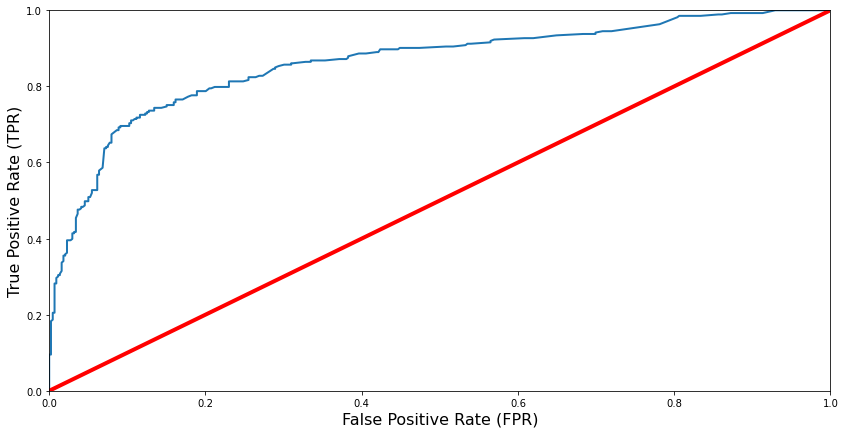

In [61]:
# ROC AUC Curve
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [62]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score_log_reg:", r_a_score)

ROC-AUC-Score_log_reg: 0.8620908324780762


In [63]:
# K-Nearest Neighbour
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(KNN)))
confusion_matrix_model(KNN)

Accuracy: 0.7992908499950753


,Predicted Dead,Predicted Survived
Actual Dead,0.85,0.15
Actual Survived,0.22,0.78


In [64]:
y_scores=KNN.predict_proba(x_train)
y_scores=y_scores[:,1]

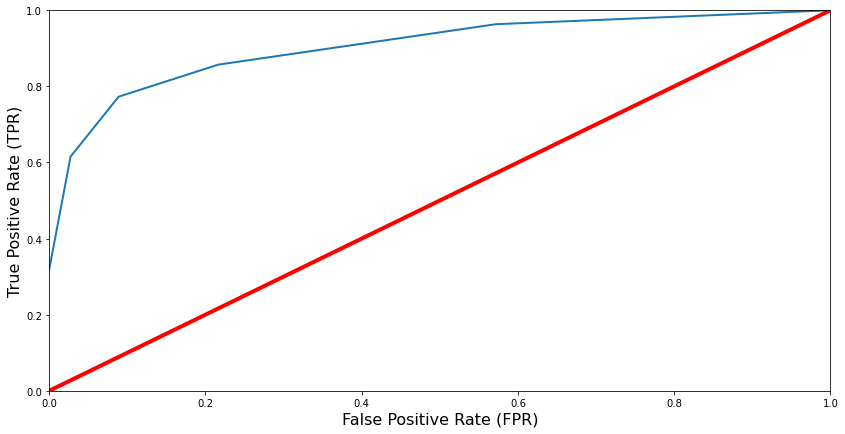

In [65]:
# ROC AUC Curve
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [66]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score_K_Nearest:", r_a_score)

ROC-AUC-Score_K_Nearest: 0.9032891937219956


In [67]:
# Naive Bayes
classifier = GaussianNB()
classifier.fit(x_train, y_train)

print("Accuracy: "+str(acc_score(classifier)))
confusion_matrix_model(classifier)

Accuracy: 0.7894415443711219


,Predicted Dead,Predicted Survived
Actual Dead,0.75,0.25
Actual Survived,0.17,0.83


In [68]:
y_scores=classifier.predict_proba(x_train)
y_scores=y_scores[:,1]

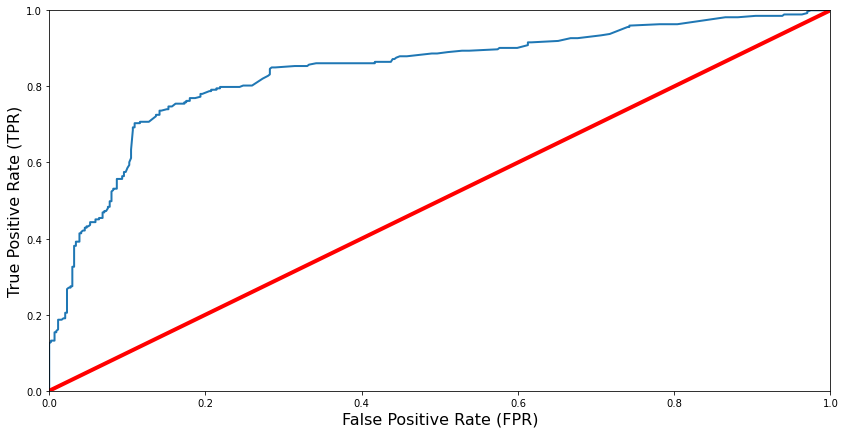

In [69]:
# ROC AUC Curve
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [70]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score_Naive:", r_a_score)

ROC-AUC-Score_Naive: 0.8397373317646667


# 4. Model for Competition 

Based on the above information, we can see that logisitic regression is out perform among these three models based on the accuracy rate. However, based on the ROC, KNN is the best model among these three. Therefore, I will use the logisitic and KNN model to predict the survival rate.

In [71]:
pred_test=log_reg.predict(test_df.drop("PassengerId",axis=1).copy())
submission_logreg=pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": pred_test})
submission_logreg.to_csv("MSDS422_logreg.csv",index=False)

In [72]:
pred_test=KNN.predict(test_df.drop("PassengerId",axis=1).copy())
submission_KNN=pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": pred_test})
submission_KNN.to_csv("MSDS422_KNN.csv",index=False)

In [73]:
submission_logreg.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [74]:
submission_KNN.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


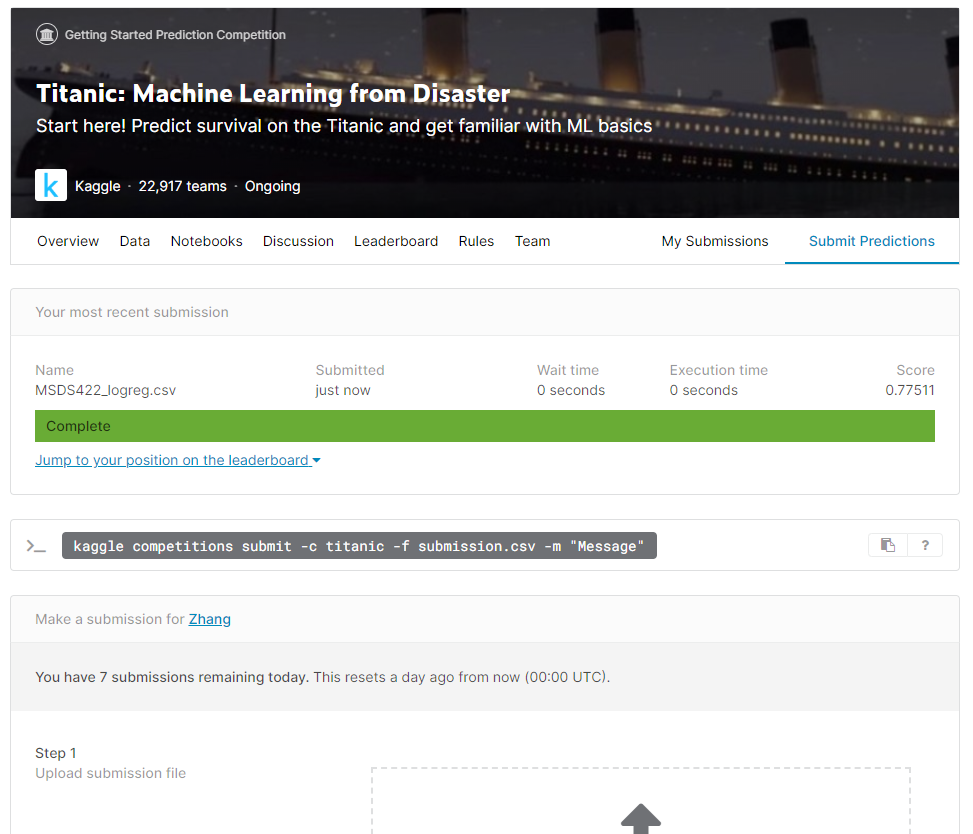

In [75]:
from IPython.display import Image
Image("Assignment_3_logreg.png")

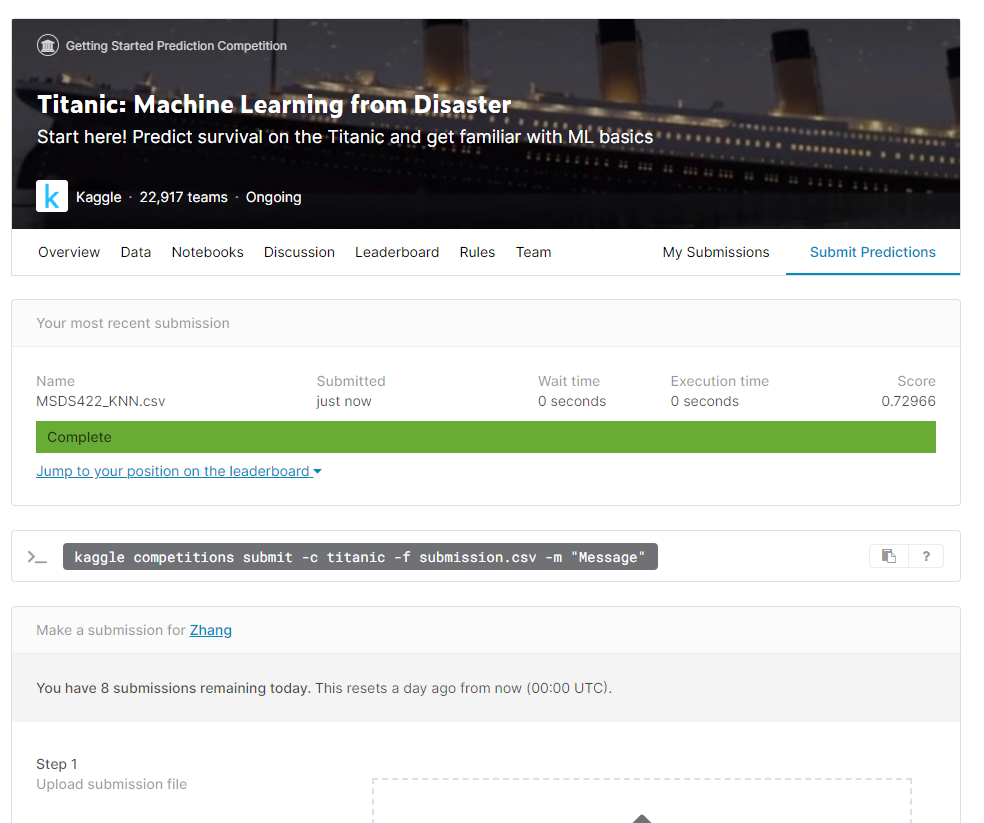

In [76]:
from IPython.display import Image
Image("Assignment_3_KNN.png")

We can see from the above that the logreg model has better result in preiction comparing with KNN. Even thought KNN method performs well on the train date judging by the ROC method, the reality is KNN model doesn't perform well in the test dataset. 

# Reference: 
Basic Classification methods for Titanic: 
https://www.kaggle.com/angps95/basic-classification-methods-for-titanic

Titanic: Machine Learning from Disaster¶: 
https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb

Naive Bayes Probabilistic ML - Titanic survival
https://www.kaggle.com/dimitreoliveira/naive-bayes-probabilistic-ml-titanic-survival